In [6]:
import time
import numpy as np
import matplotlib.pyplot as plt

In [7]:
import matplotlib.pyplot as plt
plt.style.use('default')
plt.rcParams.update({"text.usetex": True,
    "font.family": "sans-serif",
    "axes.formatter.use_mathtext": True
})

In [8]:
def td_noise_weighted_inner_product(aa, bb, cc, duration):
    """
    Calculate the noise weighted inner product between two arrays in the time domain.

    Parameters
    ==========
    aa: array_like
        Array to be complex conjugated
    bb: array_like
        Array not to be complex conjugated
    cc: array_like
        Noise correlation matrix
    duration: float
        duration of the data

    Returns
    =======
    Noise-weighted inner product.
    """

    _, qq = np.linalg.eigh(cc)
    aa_qq, bb_qq = np.dot(qq, aa), np.dot(qq, bb)
    sigmasq = np.diag(np.dot(np.linalg.inv(cc), qq.T))
    integrand = np.conj(aa_qq) * sigmasq * bb_qq
    return 4 / duration * np.sum(integrand)

In [9]:
def noise_weighted_inner_product(aa, bb, power_spectral_density, duration):
    """
    Calculate the noise weighted inner product between two arrays.

    Parameters
    ==========
    aa: array_like
        Array to be complex conjugated
    bb: array_like
        Array not to be complex conjugated
    power_spectral_density: array_like
        Power spectral density of the noise
    duration: float
        duration of the data

    Returns
    =======
    Noise-weighted inner product.
    """

    integrand = np.conj(aa) * bb / power_spectral_density
    return 4 / duration * np.sum(integrand)

### Runtime

In [10]:
N_arr, runtime_arr = [10, 50, 100, 500, 1000, 3000, 5000, 7000], []
for idx, N in enumerate(N_arr):
    aa = np.random.random(N)
    bb = np.random.random(N)
    cc = np.random.random((N,N))
    start_time = time.time()
    td_noise_weighted_inner_product(aa, bb, cc, 4)
    runtime = time.time() - start_time
    runtime_arr.append(runtime)

In [11]:
runtime_arr_ = []
for idx, N in enumerate(N_arr):
    aa = np.random.random(N)
    bb = np.random.random(N)
    cc = np.random.random((N,N))
    start_time = time.time()
    noise_weighted_inner_product(aa, bb, cc, 4)
    runtime = time.time() - start_time
    runtime_arr_.append(runtime)

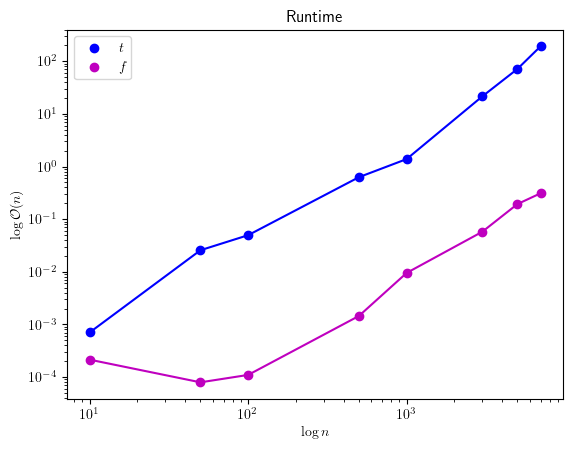

In [17]:
plt.loglog(N_arr, runtime_arr, color='b')
plt.scatter(N_arr, runtime_arr, color='b', label='$t$')
plt.loglog(N_arr, runtime_arr_, color='m')
plt.scatter(N_arr, runtime_arr_, color='m', label='$f$')
plt.legend()
plt.xlabel('$\\log n$')
plt.ylabel('$\\log\\mathcal{O}(n)$')
plt.title('Runtime')
plt.show()